In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from tqdm.auto import tqdm

%matplotlib inline

In [2]:
SEED = 122

np.random.seed(SEED)

In [3]:
X, y = make_regression(n_samples=500, n_features=1, n_informative=1, noise=0.05, random_state=SEED)

In [4]:
train_ind, test_ind = train_test_split(range(len(X)), test_size=0.3, random_state=SEED)

Класс регрессионных моделей: $h(x) = \beta_0 + \sum_i^m \beta_i x^i$

Эмпирический риск: $R^* = MSE_{regr}+ \lambda (0.5 (1 - \alpha) R_{ridge} + \alpha R_{lasso})$

Кросс-валидация: Holdout(70/30)

Построить графики зависимости среднеквадратичной ошибки (MSE) регрессионной модели на обучающей и тестовой выборках от параметра m (числа регрессоров в регрессионной модели)

In [5]:
def plot_degree_mse(max_degree: int = 1, alpha: float = 1., l1_ratio: float = 0.5) -> None:
    mse_train, mse_test = [], []
    degrees = np.arange(1, max_degree + 1)
    
    for m in degrees:
        X_poly = np.hstack((X**(i+1) for i in range(m)))
        
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=SEED)
        model = model.fit(X_poly[train_ind], y[train_ind])
        
        y_pred = model.predict(X_poly[train_ind])
        mse_train.append(mean_squared_error(y[train_ind], y_pred))
        
        y_pred = model.predict(X_poly[test_ind])
        mse_test.append(mean_squared_error(y[test_ind], y_pred))
        
    _, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    axes[0].plot(degrees, mse_train)
    axes[1].plot(degrees, mse_test)
    
    axes[0].set_title(fr"MSE on Train $\lambda = {alpha}, \alpha = {l1_ratio}$", size=14)
    axes[1].set_title(fr"MSE on Test $\lambda = {alpha}, \alpha = {l1_ratio}$", size=14)
    
    for ax in axes:
        ax.set_xlabel("m", size=12)
        ax.set_ylabel("MSE", size=12)
        ax.set_xticks(degrees)
        ax.grid(True)

    plt.show()

а) $\lambda = 0$

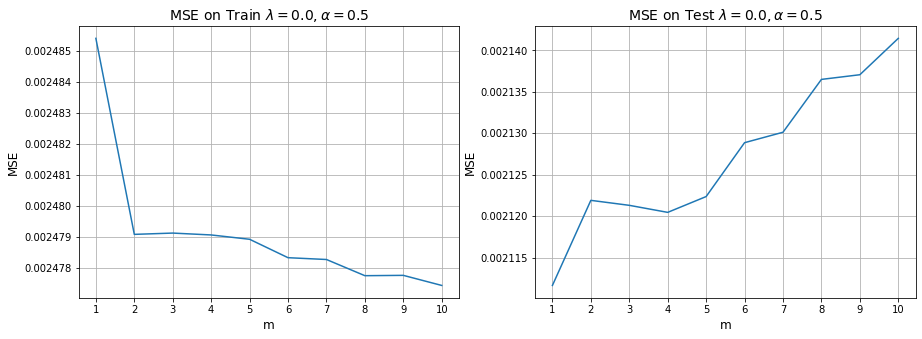

In [6]:
plot_degree_mse(max_degree=10, alpha=0.)

б) $\lambda = 0.1 , \alpha = 0$

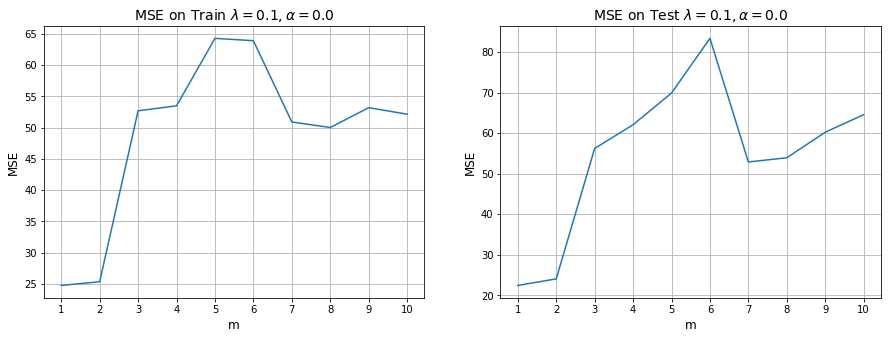

In [7]:
plot_degree_mse(max_degree=10, alpha=0.1, l1_ratio=0.)

в) $\lambda = 0.1 , \alpha = 0.5$

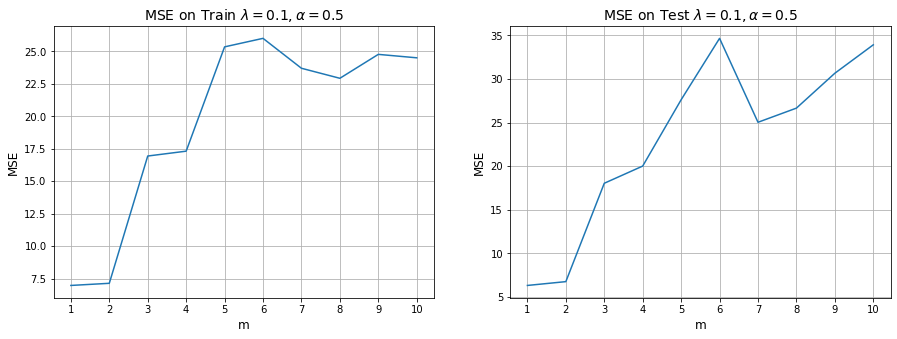

In [8]:
plot_degree_mse(max_degree=10, alpha=0.1, l1_ratio=0.5)

г) $\lambda = 0.1 , \alpha = 1$

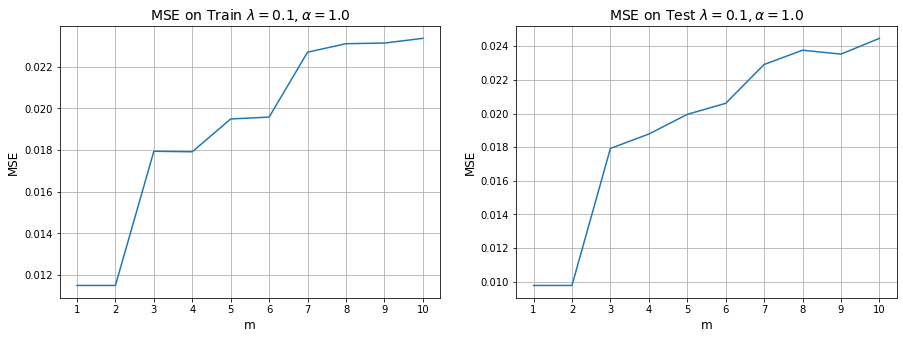

In [9]:
plot_degree_mse(max_degree=10, alpha=0.1, l1_ratio=1.)

Для некоторого фиксированного m построить графики зависимости значений коэффициентов elastic net-регрессии от параметра $\lambda$

Пусть m = 3

In [10]:
def plot_alpha_coef(l1_ratio: float = 0.5, num: int = 10) -> None:
    coefs = np.empty((4, num))
    alphas = np.logspace(-num + 1, 0, num=num)
    
    X_poly = np.hstack((X**(i+1) for i in range(3)))
    X_train, y_train = X_poly[train_ind], y[train_ind]
    
    for idx, alpha in enumerate(alphas):        
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=SEED)
        model = model.fit(X_train, y_train)
        coefs[0, idx] = model.intercept_
        coefs[1:, idx] = model.coef_
        
    _, axes = plt.subplots(2, 2, figsize=(18, 11))
    axes = axes.flatten()
        
    for idx, (ax, coef) in enumerate(zip(axes, coefs)): 
        ax.plot(coef)
        ax.set_title(fr"$\beta_{idx} (m = 3, \alpha = {l1_ratio})$", size=14)    
        ax.set_xlabel(r"$\lambda$", size=12)
        ax.set_ylabel(fr"$\beta_{idx}$", size=12)
        ax.set_xticks(range(len(alphas)))
        ax.set_xticklabels(alphas)
        ax.grid(True)

    plt.show()

а) $\alpha = 0$

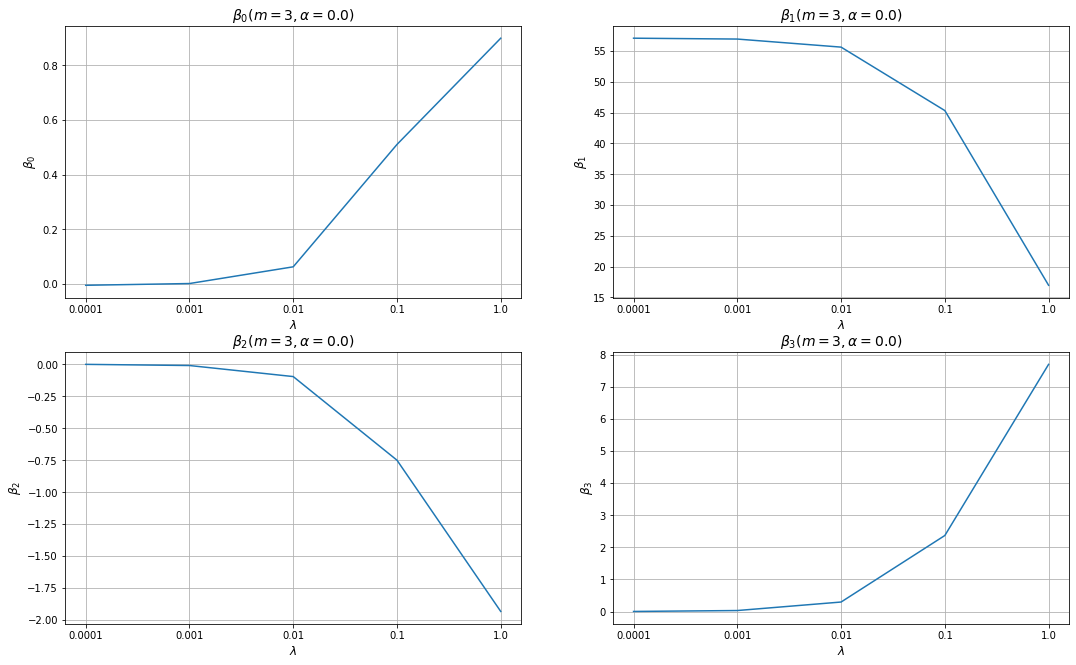

In [11]:
plot_alpha_coef(num=5, l1_ratio=0.)

б) $\alpha = 0.5$

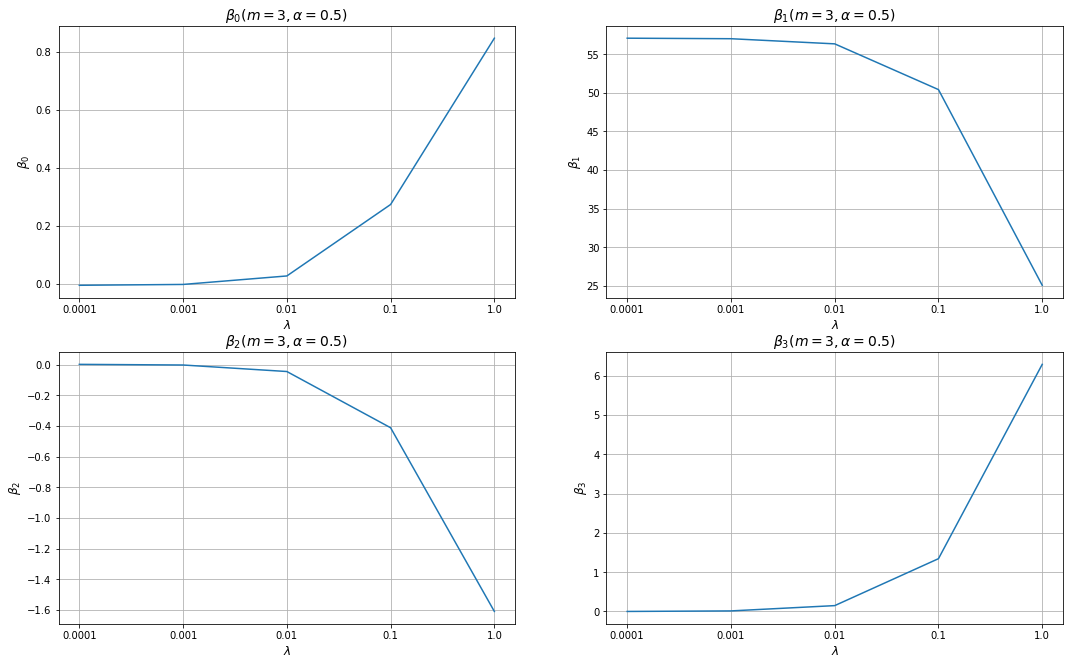

In [12]:
plot_alpha_coef(num=5, l1_ratio=0.5)

в) $\alpha = 1$

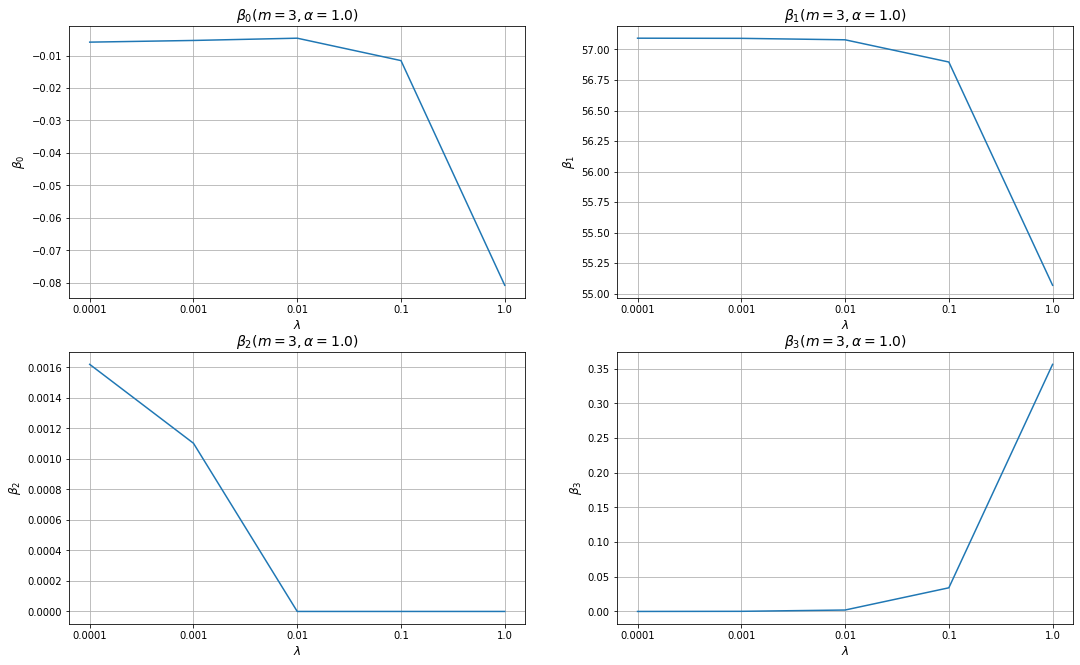

In [13]:
plot_alpha_coef(num=5, l1_ratio=1.)

Построить графики зависимости среднеквадратичной ошибки (MSE) регрессионной модели на обучающей и тестовой выборках от параметра $\alpha$

Пусть m = 3

In [14]:
def plot_l1_ratio_mse(degree: int = 1, alpha: float = 1., num: int = 11) -> None:
    mse_train, mse_test = [], []
    l1_ratios = np.linspace(0, 1, num=num)
    
    X_poly = np.hstack((X**(i+1) for i in range(degree)))
    X_train, X_test = X_poly[train_ind], X_poly[test_ind]
    y_train, y_test = y[train_ind], y[test_ind]
    
    for l1_ratio in l1_ratios:
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=SEED)
        model = model.fit(X_train, y_train)
        
        y_pred = model.predict(X_train)
        mse_train.append(mean_squared_error(y_train, y_pred))
        
        y_pred = model.predict(X_test)
        mse_test.append(mean_squared_error(y_test, y_pred))
        
    _, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    axes[0].plot(l1_ratios, mse_train)
    axes[1].plot(l1_ratios, mse_test)
    
    axes[0].set_title(fr"MSE on Train $\lambda = {alpha}, m = {degree}$", size=14)
    axes[1].set_title(fr"MSE on Test $\lambda = {alpha}, m = {degree}$", size=14)
    
    for ax in axes:
        ax.set_xlabel(r"$\alpha$", size=12)
        ax.set_ylabel("MSE", size=12)
        ax.set_xticks(l1_ratios)
        ax.grid(True)

    plt.show()

а) $\lambda = \lambda_1 = 0.01$

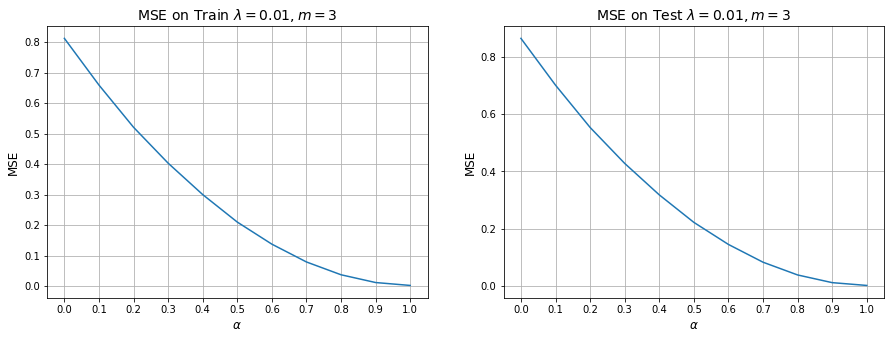

In [15]:
plot_l1_ratio_mse(degree=3, alpha=0.01)

б) $\lambda = \lambda_2 = 0.1$

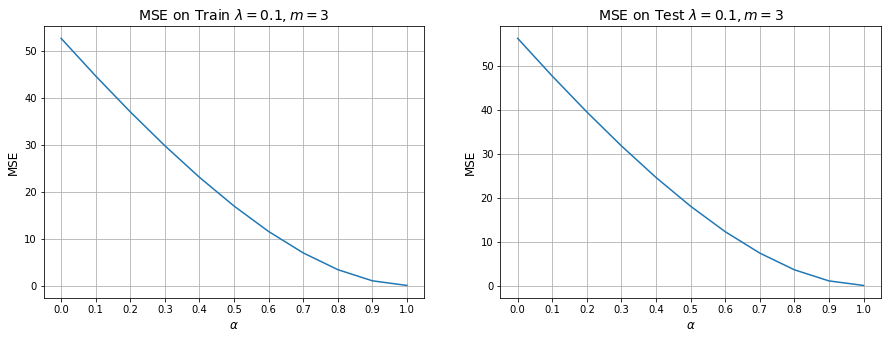

In [16]:
plot_l1_ratio_mse(degree=3, alpha=0.1)

Построить графики зависимости выхода регрессионной модели от x, наложенные на диаграмму рассеяния исходных данных, при фиксированном m

Пусть m = 3

In [17]:
def plot_regression_curve(degree: int = 1, alpha: float = 1., l1_ratio: float = 0.5) -> None:    
    X_poly = np.hstack((X**(i+1) for i in range(degree)))
    X_train, y_train = X_poly[train_ind], y[train_ind]
    X_test, y_test = X[test_ind], y[test_ind]
    
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=SEED)
    model = model.fit(X_train, y_train)

    X_space = np.linspace(X_test.min() - 0.05, X_test.max() + 0.05)[:, None]
    X_space_poly = np.hstack((X_space**(i+1) for i in range(degree)))
    y_pred = model.predict(X_space_poly)
        
    plt.figure(figsize=(10, 5))
    
    plt.plot(X_space[:, 0], y_pred, c="red")
    plt.scatter(X_test[:, 0], y_test, alpha=0.5, c="blue")
    
    plt.title(r"$y = h(x)$", size=14)
    
    plt.xlabel("x", size=12)
    plt.ylabel("y", size=12)
    plt.grid(True)

    plt.show()

а) $\lambda = 0$

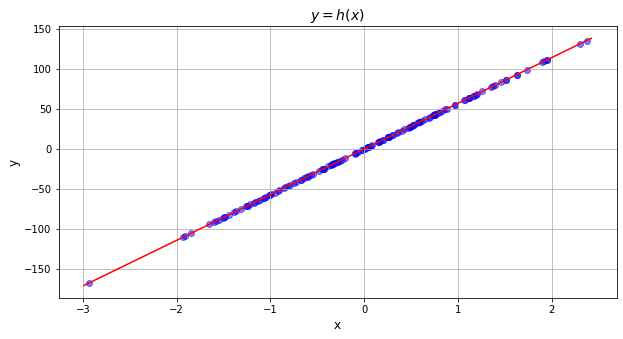

In [18]:
plot_regression_curve(degree=3, alpha=0.)

б) $\lambda = 0.1 , \alpha = 0$

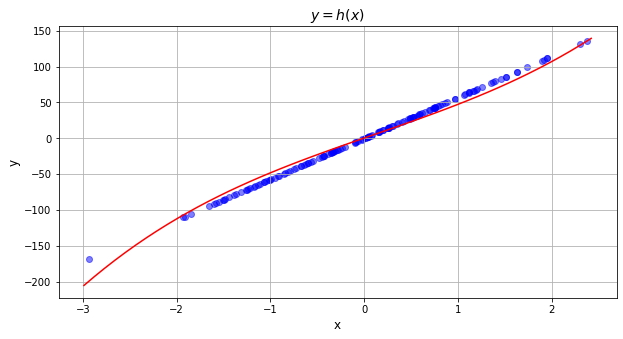

In [19]:
plot_regression_curve(degree=3, alpha=0.1, l1_ratio=0.)

в) $\lambda = 0.1 , \alpha = 0.5$

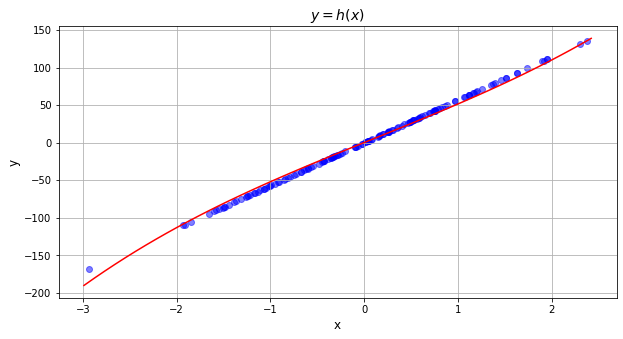

In [20]:
plot_regression_curve(degree=3, alpha=0.1, l1_ratio=0.5)

г) $\lambda = 0.1 , \alpha = 1$

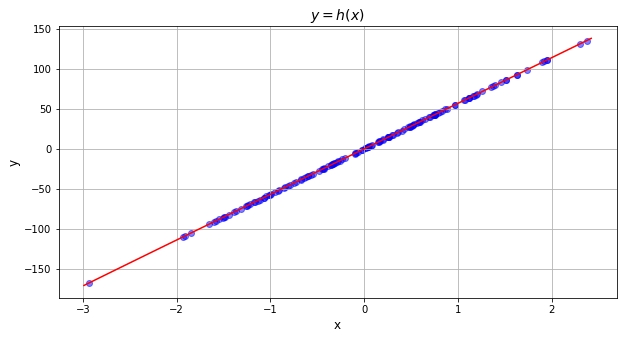

In [21]:
plot_regression_curve(degree=3, alpha=0.1, l1_ratio=1.)

Построить графики зависимости остатков модели от моделируемых значений и входной переменной, рассчитать среднее значение остатков, провести качественный анализ остатков

In [30]:
def plot_residual(degree: int = 1, alpha: float = 1., l1_ratio: float = 0.5) -> None:    
    X_poly = np.hstack((X**(i+1) for i in range(degree)))
    X_train, y_train = X_poly[train_ind], y[train_ind]
    X_test, y_test = X_poly[test_ind], y[test_ind]
    
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=SEED)
    model = model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    resid = y_test - y_pred
        
    _, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    axes[0].scatter(y_pred, resid)
    axes[0].set_title("Residuals VS Predicted", size=14)
    axes[0].set_xlabel("Predicted", size=12)
    
    axes[1].scatter(X_poly[test_ind][:, 0], resid)
    axes[1].set_title("Residuals VS Argument", size=14)
    axes[1].set_xlabel("Argument", size=12)
    
    for ax in axes:
        ax.set_ylabel("Residuals", size=12)
        ax.axhline(y=0., color='r', linestyle='--')
        ax.grid(True)

    plt.show()

а) $\lambda = 0$

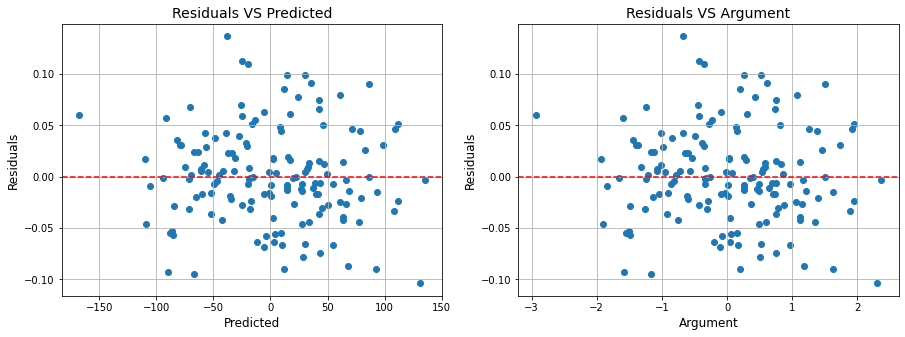

In [31]:
plot_residual(degree=3, alpha=0.)

б) $\lambda = 0.1 , \alpha = 0$

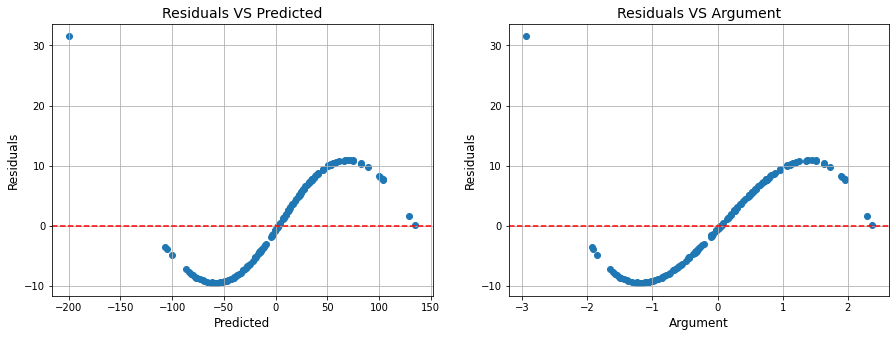

In [32]:
plot_residual(degree=3, alpha=0.1, l1_ratio=0.)

в) $\lambda = 0.1 , \alpha = 0.5$

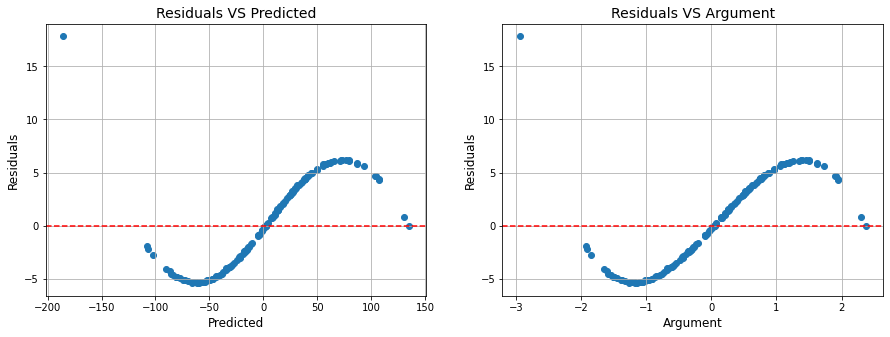

In [33]:
plot_residual(degree=3, alpha=0.1, l1_ratio=0.5)

г) $\lambda = 0.1 , \alpha = 1$

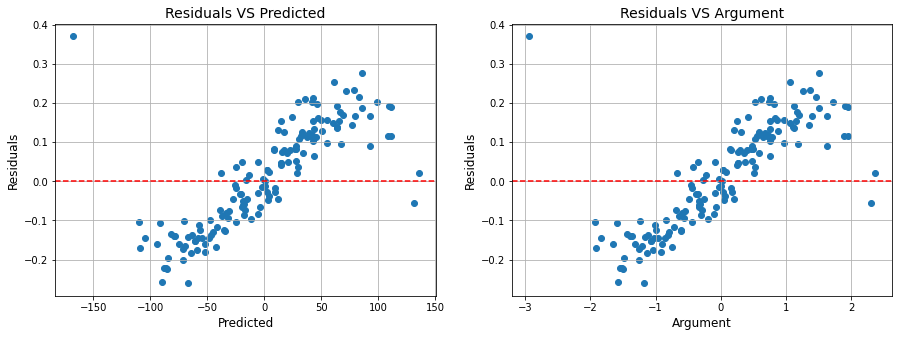

In [34]:
plot_residual(degree=3, alpha=0.1, l1_ratio=1.)

Сделать выводы по результатам сравнения elastic net-регрессий с различными значениями параметров.